<a href="https://colab.research.google.com/github/aghakishiyeva/XAI-in-LLMs/blob/new-branch/AIPI590_Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open in? Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/aghakishiyeva/XAI-in-LLMs/)

#  xAI in LLMs

## Step 1: Install and Import Required Libraries
We install and import the libraries needed for loading datasets, generating embeddings, performing dimensionality reduction, and visualizing results.


In [11]:
!pip install transformers datasets umap-learn matplotlib seaborn

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from transformers import AutoTokenizer, AutoModel
import torch
from datasets import load_dataset

## Step 2: Load the Amazon Reviews Dataset
We load a subset of 200 samples from the Amazon Reviews dataset and extract the text contents of reviews.

In [2]:
dataset = load_dataset("amazon_polarity", split="train[:200]")
texts = dataset["content"]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [5]:
texts[0:5]

['This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^',
 "I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.",
 'This soundtrack is my favorite music of all time, hands down. The intense sadness of "Prisoners of Fate" (which means all th

## Step 3: Load Pre-trained Model and Tokenizer
We load the `sentence-transformers/all-mpnet-base-v2` model and its tokenizer from Hugging Face. This model will generate embeddings for our Amazon review texts. We use this model because it provides high-quality sentence embeddings, capturing both semantic meaning and sentiment, making it suitable for analyzing the Amazon Polarity dataset.

In [6]:
model_name = "sentence-transformers/all-mpnet-base-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


## Step 4: Tokenize Text and Generate Embeddings
We tokenize the review texts, applying padding and truncation to ensure uniform input length. Then, we pass the tokenized data through the model to generate embeddings, using mean pooling to create fixed-length embeddings for each review. Finally, we convert these embeddings to a NumPy array for visualization.

In [7]:
inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

In [8]:
# Generate embeddings
with torch.no_grad():
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1)
    embeddings_np = embeddings.cpu().numpy()

## Step 5: Apply Dimensionality Reduction Techniques
We reduce the embedding dimensions to 2D for visualization using three techniques, **PCA**, **t-SNE**, and **UMAP**:

In [9]:
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(embeddings_np)

tsne = TSNE(n_components=2, perplexity=5, random_state=42)  # Perplexity set lower due to fewer samples
tsne_embeddings = tsne.fit_transform(embeddings_np)

umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_embeddings = umap_reducer.fit_transform(embeddings_np)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


## Step 7: Visualize Embeddings with PCA, t-SNE, and UMAP
We create subplots to compare the 2D embeddings produced by above techniques. These plots help us interpret patterns in the embedding space and observe clustering behavior across methods.

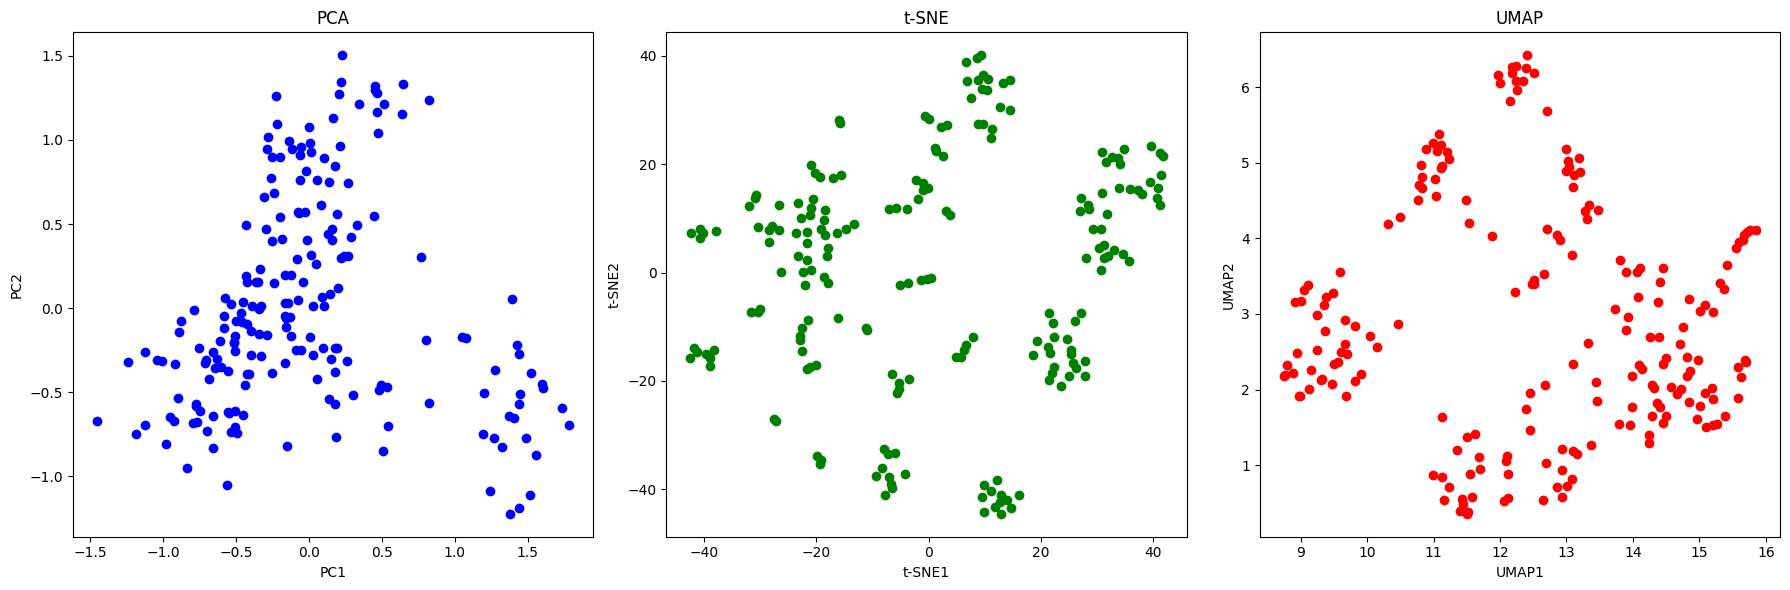

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# PCA
axes[0].scatter(pca_embeddings[:, 0], pca_embeddings[:, 1], c='blue')
axes[0].set_title('PCA')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')

# t-SNE
axes[1].scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c='green')
axes[1].set_title('t-SNE')
axes[1].set_xlabel('t-SNE1')
axes[1].set_ylabel('t-SNE2')

# UMAP
axes[2].scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c='red')
axes[2].set_title('UMAP')
axes[2].set_xlabel('UMAP1')
axes[2].set_ylabel('UMAP2')

plt.tight_layout()
plt.show()

## Comparison of Techniques

**PCA**: PCA captures the main variance in the data by projecting it onto principal components. It provides a general overview but may not reveal distinct clusters due to its linear nature.<br><br>
**t-SNE**: t-SNE focuses on preserving local structure, making similar points cluster closely together. It effectively highlights smaller groups but can distort the overall global layout.<br><br>
**UMAP**: UMAP balances both local and global relationships, forming distinct clusters while preserving the broader structure. It provides clear, interpretable groupings suitable for complex data patterns.

_______________

Notes: <br>

*   *We might obtain more distinct clusters with additional data, but I attempted to extract more reviews then run out of RAM.*
*  *ChatGPT, developed by OpenAI, contributed to the code and Markdown content.*

